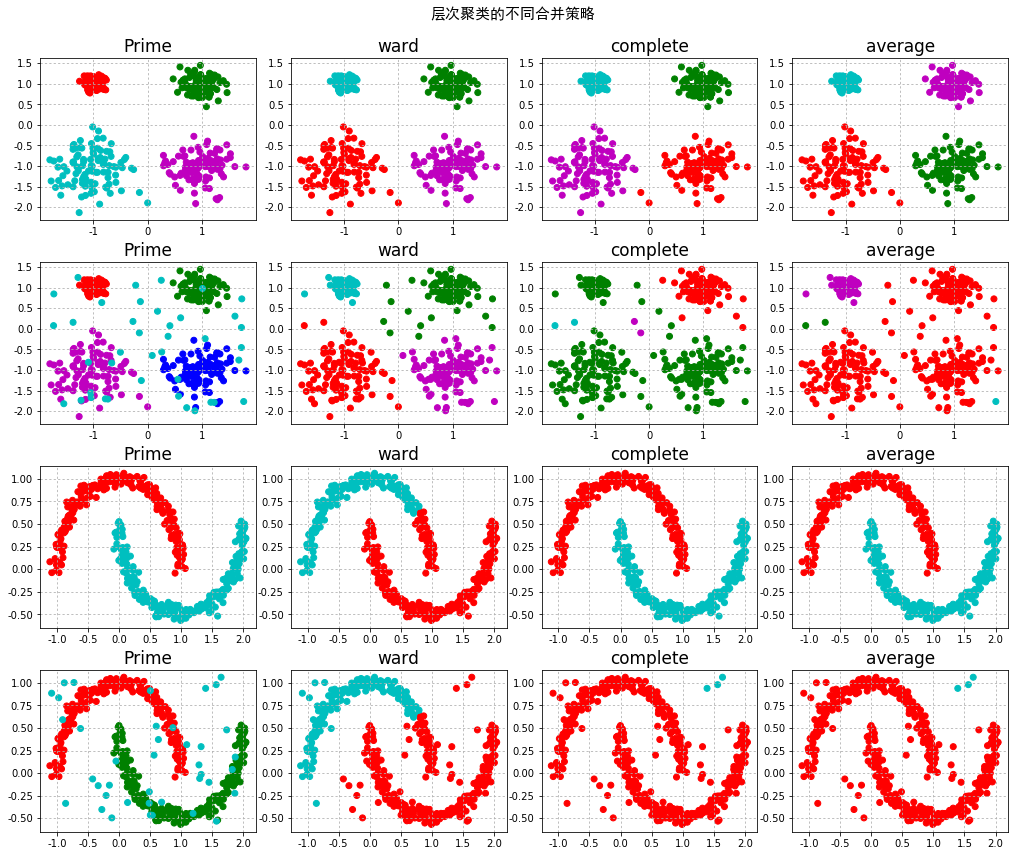

In [2]:
# !/usr/bin/python
# -*- coding:utf-8 -*-

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
import sklearn.datasets as ds
import warnings
import matplotlib as mpl
from matplotlib.font_manager import FontProperties
font_set = FontProperties(fname='../fonts/simhei.ttf', size=15)
fontproperties=font_set
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False


def extend(a, b):
    return 1.05 * a - 0.05 * b, 1.05 * b - 0.05 * a


warnings.filterwarnings(action='ignore', category=UserWarning)
np.set_printoptions(suppress=True)
np.random.seed(0)
n_clusters = 4
N = 400
data1, y1 = ds.make_blobs(n_samples=N, n_features=2, centers=((-1, 1), (1, 1), (1, -1), (-1, -1)),
                          cluster_std=(0.1, 0.2, 0.3, 0.4), random_state=0)
data1 = np.array(data1)
n_noise = int(0.1 * N)
r = np.random.rand(n_noise, 2)
data_min1, data_min2 = np.min(data1, axis=0)
data_max1, data_max2 = np.max(data1, axis=0)
r[:, 0] = r[:, 0] * (data_max1 - data_min1) + data_min1
r[:, 1] = r[:, 1] * (data_max2 - data_min2) + data_min2
data1_noise = np.concatenate((data1, r), axis=0)
y1_noise = np.concatenate((y1, [4] * n_noise))

data2, y2 = ds.make_moons(n_samples=N, noise=.05)
data2 = np.array(data2)
n_noise = int(0.1 * N)
r = np.random.rand(n_noise, 2)
data_min1, data_min2 = np.min(data2, axis=0)
data_max1, data_max2 = np.max(data2, axis=0)
r[:, 0] = r[:, 0] * (data_max1 - data_min1) + data_min1
r[:, 1] = r[:, 1] * (data_max2 - data_min2) + data_min2
data2_noise = np.concatenate((data2, r), axis=0)
y2_noise = np.concatenate((y2, [3] * n_noise))


cm = mpl.colors.ListedColormap(['r', 'g', 'b', 'm', 'c'])
plt.figure(figsize=(14, 12), facecolor='w')
plt.cla()
linkages = ("ward", "complete", "average")
for index, (n_clusters, data, y) in enumerate(((4, data1, y1), (4, data1_noise, y1_noise),
                                               (2, data2, y2), (2, data2_noise, y2_noise))):
    plt.subplot(4, 4, 4 * index + 1)
    plt.scatter(data[:, 0], data[:, 1], c=y, cmap=cm)
    plt.title('Prime', fontsize=17)
    plt.grid(b=True, ls=':')
    data_min1, data_min2 = np.min(data, axis=0)
    data_max1, data_max2 = np.max(data, axis=0)
    plt.xlim(extend(data_min1, data_max1))
    plt.ylim(extend(data_min2, data_max2))

    connectivity = kneighbors_graph(data, n_neighbors=7, mode='distance', metric='minkowski', p=2, include_self=True)
    connectivity = 0.5 * (connectivity + connectivity.T)
    for i, linkage in enumerate(linkages):
        ac = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean',
                                     connectivity=connectivity, linkage=linkage)
        ac.fit(data)
        y = ac.labels_
        plt.subplot(4, 4, i + 2 + 4 * index)
        plt.scatter(data[:, 0], data[:, 1], c=y, cmap=cm)
        plt.title(linkage, fontsize=17)
        plt.grid(b=True, ls=':')
        plt.xlim(extend(data_min1, data_max1))
        plt.ylim(extend(data_min2, data_max2))
plt.suptitle(u'层次聚类的不同合并策略', fontsize=20, fontproperties=fontproperties)
plt.tight_layout(0.5, rect=(0, 0, 1, 0.95))
plt.show()